In [2]:
pip install spotipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Configure suas credenciais
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id='b7c5247f151e420fa87c70bd40a0a0e3',
    client_secret='7a9c2913239f40fc87a60f4f30d072b4'))

# Puxe informações de um artista (substitua pelo ID do artista que quer analisar)
artist_id = "3TVXtAsR1Inumwj472S9r4"  # exemplo: Drake
artist_data = sp.artist(artist_id)
print(artist_data)
''

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'}, 'followers': {'href': None, 'total': 92975727}, 'genres': ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap'], 'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4', 'id': '3TVXtAsR1Inumwj472S9r4', 'images': [{'url': 'https://i.scdn.co/image/ab6761610000e5eb4293385d324db8558179afd9', 'height': 640, 'width': 640}, {'url': 'https://i.scdn.co/image/ab676161000051744293385d324db8558179afd9', 'height': 320, 'width': 320}, {'url': 'https://i.scdn.co/image/ab6761610000f1784293385d324db8558179afd9', 'height': 160, 'width': 160}], 'name': 'Drake', 'popularity': 96, 'type': 'artist', 'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}


In [4]:
# # Puxe as 10 músicas mais populares de um artista
# top_tracks = sp.artist_top_tracks(artist_id)
# for track in top_tracks['tracks']:
#     # Verifique se há mais de um artista na faixa
#     if len(track['artists']) > 1:
#         print(f"Feat encontrado: {track['name']} com {[artist['name'] for artist in track['artists']]}")


Feat encontrado: One Dance com ['Drake', 'Wizkid', 'Kyla']
Feat encontrado: WAIT FOR U (feat. Drake & Tems) com ['Future', 'Drake', 'Tems']
Feat encontrado: Jimmy Cooks (feat. 21 Savage) com ['Drake', '21 Savage']
Feat encontrado: Rich Baby Daddy (feat. Sexyy Red & SZA) com ['Drake', 'Sexyy Red', 'SZA']
Feat encontrado: Fair Trade (with Travis Scott) com ['Drake', 'Travis Scott']
Feat encontrado: It's Up (feat. Young Thug & 21 Savage) com ['Drake', 'Young Thug', '21 Savage']


In [5]:
results = sp.search(q="genre:pop", type="artist", limit=50)
artists = results['artists']['items']


In [6]:
# artist_data_list = []

# # Buscar por artistas com base no gênero e armazenar dados
# for genre in ["pop", "rock", "hip hop"]:  # Adicione mais gêneros se quiser
#     results = sp.search(q=f"genre:{genre}", type="artist", limit=50)
#     for artist in results['artists']['items']:
#         artist_data = {
#             "name": artist['name'],
#             "id": artist['id'],
#             "followers": artist['followers']['total'],
#             "popularity": artist['popularity'],
#             "genres": artist['genres']
#         }
#         artist_data_list.append(artist_data)


In [17]:
pip install networkx


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 495.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.7 MB 1.4 MB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.7 MB 2.4 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.7 MB 2.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.7 MB 2.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.7 MB 2.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.7 MB 2.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.7 MB 2.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.7 MB 2.3 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.7 MB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.7 MB 2.8 MB/s eta 0:00:01
   ---------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import networkx as nx





In [76]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

# Configure suas credenciais
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id='b7c5247f151e420fa87c70bd40a0a0e3',
    client_secret='7a9c2913239f40fc87a60f4f30d072b4'
))

# Lista de nomes dos artistas brasileiros
artistas_brasileiros = [
    'Anitta', 'Alok', 'Jorge & Mateus', 'Marília Mendonça', 'Gusttavo Lima', 'Zé Neto & Cristiano',
    'Ludmilla', 'Wesley Safadão', 'Ivete Sangalo', 'Luan Santana', 'Tiago Iorc', 'Luísa Sonza',
    'Simone & Simaria', 'Dilsinho', 'Maiara & Maraisa', 'Pabllo Vittar', 'Jão', 'Ferrugem', 'Sandy',
    'Nando Reis', 'Melim', 'Vitão', 'Kevinho', 'Lexa', 'MC Zaac', 'Sorriso Maroto', 'Anavitoria',
    'Os Barões da Pisadinha', 'Djonga', 'Mc Livinho', 'Projota', 'Gabriel, o Pensador', 'Emicida',
    'Criolo', 'Pitty', 'O Terno', 'Tribalistas', 'BaianaSystem', 'Thiaguinho', 'Negra Li', 'Xamã',
    'Tiê', 'Silva', 'Fresno', 'Scalene', 'Lagum', 'Vitor Kley', 'Carol Biazin', 'Clarice Falcão',
    'Pedro Sampaio', 'Caetano Veloso', 'Gilberto Gil', 'Maria Bethânia', 'Gal Costa', 'Tom Zé',
    'Baco Exu do Blues', 'Luccas Carlos', 'Maneva', 'Liniker e os Caramelows', 'Karol Conká',
    'Marcelo D2', 'MC Carol', 'Zeca Pagodinho', 'Martinho da Vila', 'Alcione', 'Armandinho',
    'MC Don Juan', 'MC Kevinho', 'Nego do Borel', 'Claudia Leitte', 'Paulo Ricardo', 'Lulu Santos',
    'Di Ferrero', 'Péricles', 'Matuê', 'Clarissa', 'Titãs', 'Capital Inicial', 'Iza',
    'Raimundos', 'Los Hermanos', 'Marisa Monte', 'Elza Soares', 'Daniela Mercury', 'Duda Beat',
    'Tropkillaz', 'Filipe Ret', 'Hungria Hip Hop', 'Jota Quest', 'CPM 22', 'Detonautas',
    'Cássia Eller', 'Otto', 'Lucas Lucco', 'Cassiano', 'Johnny Hooker', 'Mahmundi', 'Marina Sena',
    'Rubel', 'Erasmo Carlos'
]

# Função para buscar o ID do artista
def obter_id_artista(nome_artista):
    resultado = sp.search(q=nome_artista, type='artist', limit=1)
    if resultado['artists']['items']:
        return resultado['artists']['items'][0]['id']
    return None

# Extrair informações dos artistas e feats
dados_artistas = []
dados_feats = []

for nome_artista in artistas_brasileiros:
    try:
        # Obter o ID do artista
        artist_id = obter_id_artista(nome_artista)
        if artist_id:
            # Informações do artista
            artist_data = sp.artist(artist_id)
            dados_artistas.append({
                'id': artist_data['id'],
                'nome': artist_data['name'],
                'seguidores': artist_data['followers']['total'],
                'popularidade': artist_data['popularity'],
                'generos': ', '.join(artist_data['genres'])
            })
            
            # Obter as 10 músicas mais populares do artista
            top_tracks = sp.artist_top_tracks(artist_id)
            for track in top_tracks['tracks']:
                # Verifique se há colaborações (mais de um artista na faixa)
                if len(track['artists']) > 1:
                    dados_feats.append({
                        'artista_principal': artist_data['name'],
                        'id_track': track['id'],
                        'nome_track': track['name'],
                        'popularidade_track': track['popularity'],
                        'colaboradores': ', '.join([artista['name'] for artista in track['artists'] if artista['id'] != artist_id])
                    })
        time.sleep(0.1)  # Intervalo para evitar limite de taxa
    except Exception as e:
        print(f"Erro ao processar {nome_artista}: {e}")

# Salvar os dados em arquivos CSV
df_artistas = pd.DataFrame(dados_artistas)
df_feats = pd.DataFrame(dados_feats)

df_artistas.to_csv('artistas_brasileiros.csv', index=False)
df_feats.to_csv('feats_brasileiros.csv', index=False)

print("Dados salvos com sucesso!")

Dados salvos com sucesso!


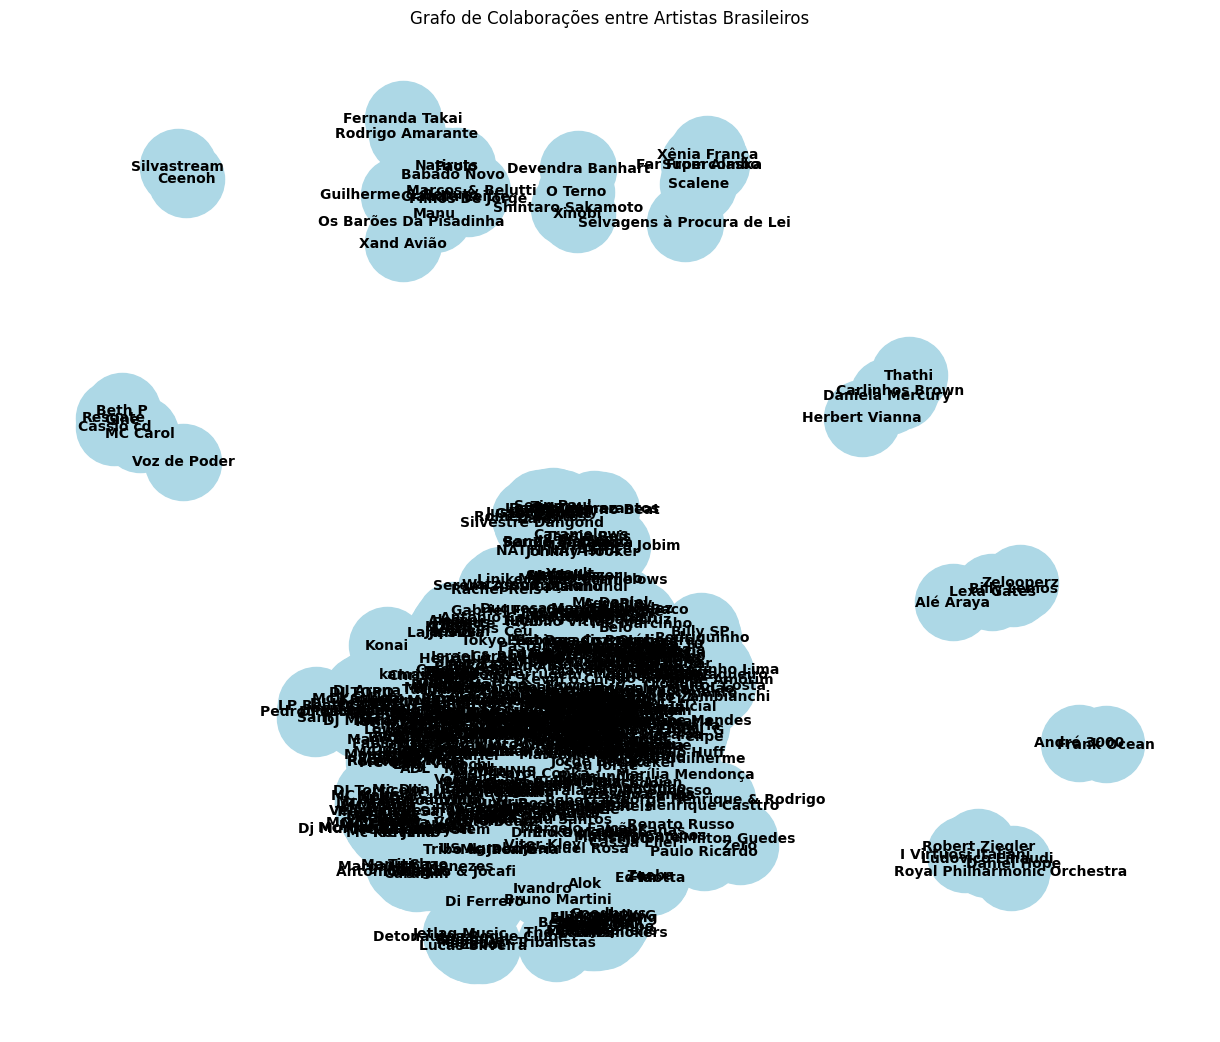

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
feats_df = pd.read_csv('feats_brasileiros.csv')

# Criar o grafo
G = nx.Graph()

# Adicionar as conexões (arestas) entre os artistas
for _, row in feats_df.iterrows():
    artista_principal = row['artista_principal']
    colaboradores = row['colaboradores'].split(', ')  # Dividir colaboradores em uma lista
    for colaborador in colaboradores:
        G.add_edge(artista_principal, colaborador, track=row['nome_track'])

# Configurar o layout para a visualização
pos = nx.spring_layout(G, seed=42)  # Para uma disposição mais equilibrada

# Desenhar o grafo
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray", width=1.5)
plt.title("Grafo de Colaborações entre Artistas Brasileiros")
plt.show()


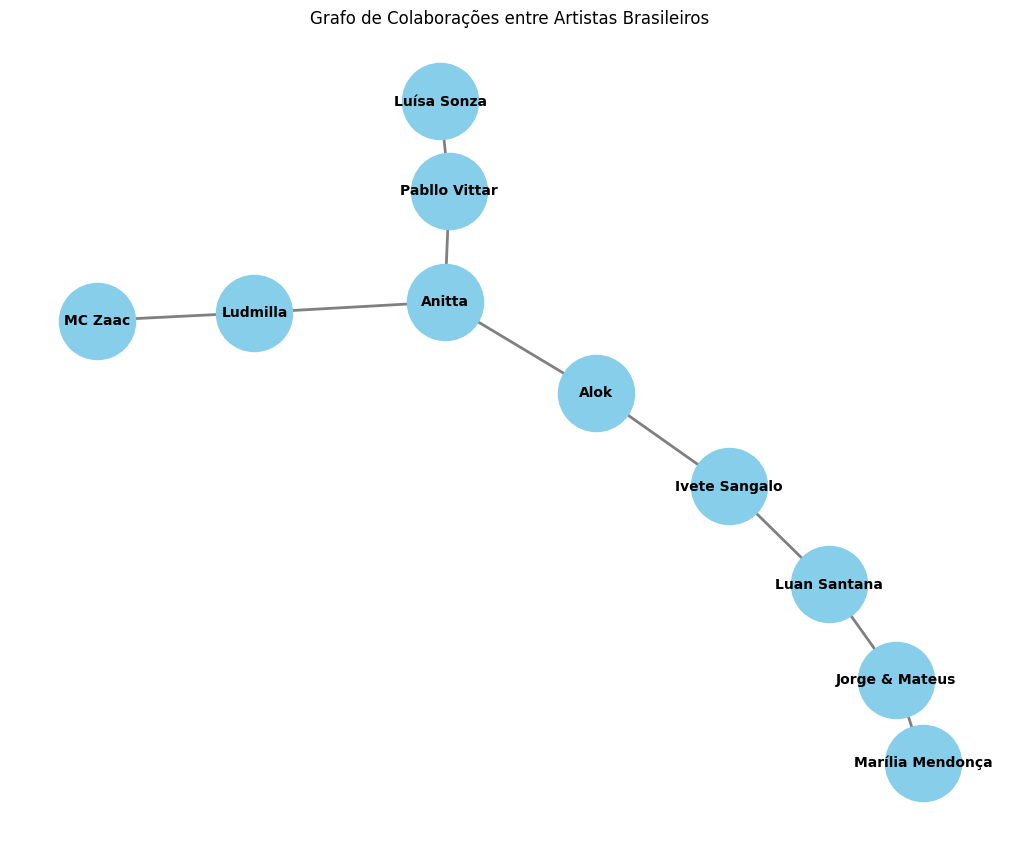

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Dados fictícios para simulação
dados_feats = [
    {'artista_principal': 'Anitta', 'colaboradores': ['Alok', 'Ludmilla', 'Pabllo Vittar']},
    {'artista_principal': 'Alok', 'colaboradores': ['Anitta', 'Ivete Sangalo']},
    {'artista_principal': 'Ludmilla', 'colaboradores': ['Anitta', 'MC Zaac']},
    {'artista_principal': 'Ivete Sangalo', 'colaboradores': ['Luan Santana', 'Alok']},
    {'artista_principal': 'Luan Santana', 'colaboradores': ['Ivete Sangalo', 'Jorge & Mateus']},
    {'artista_principal': 'Pabllo Vittar', 'colaboradores': ['Anitta', 'Luísa Sonza']},
    {'artista_principal': 'Jorge & Mateus', 'colaboradores': ['Marília Mendonça', 'Luan Santana']}
]

# Criar o grafo
G = nx.Graph()

# Adicionar as conexões (arestas) entre os artistas
for feat in dados_feats:
    artista_principal = feat['artista_principal']
    for colaborador in feat['colaboradores']:
        G.add_edge(artista_principal, colaborador)

# Configurar o layout para a visualização
pos = nx.spring_layout(G, seed=42)  # Para uma disposição mais equilibrada

# Desenhar o grafo
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray", width=2)
plt.title("Grafo de Colaborações entre Artistas Brasileiros")
plt.show()


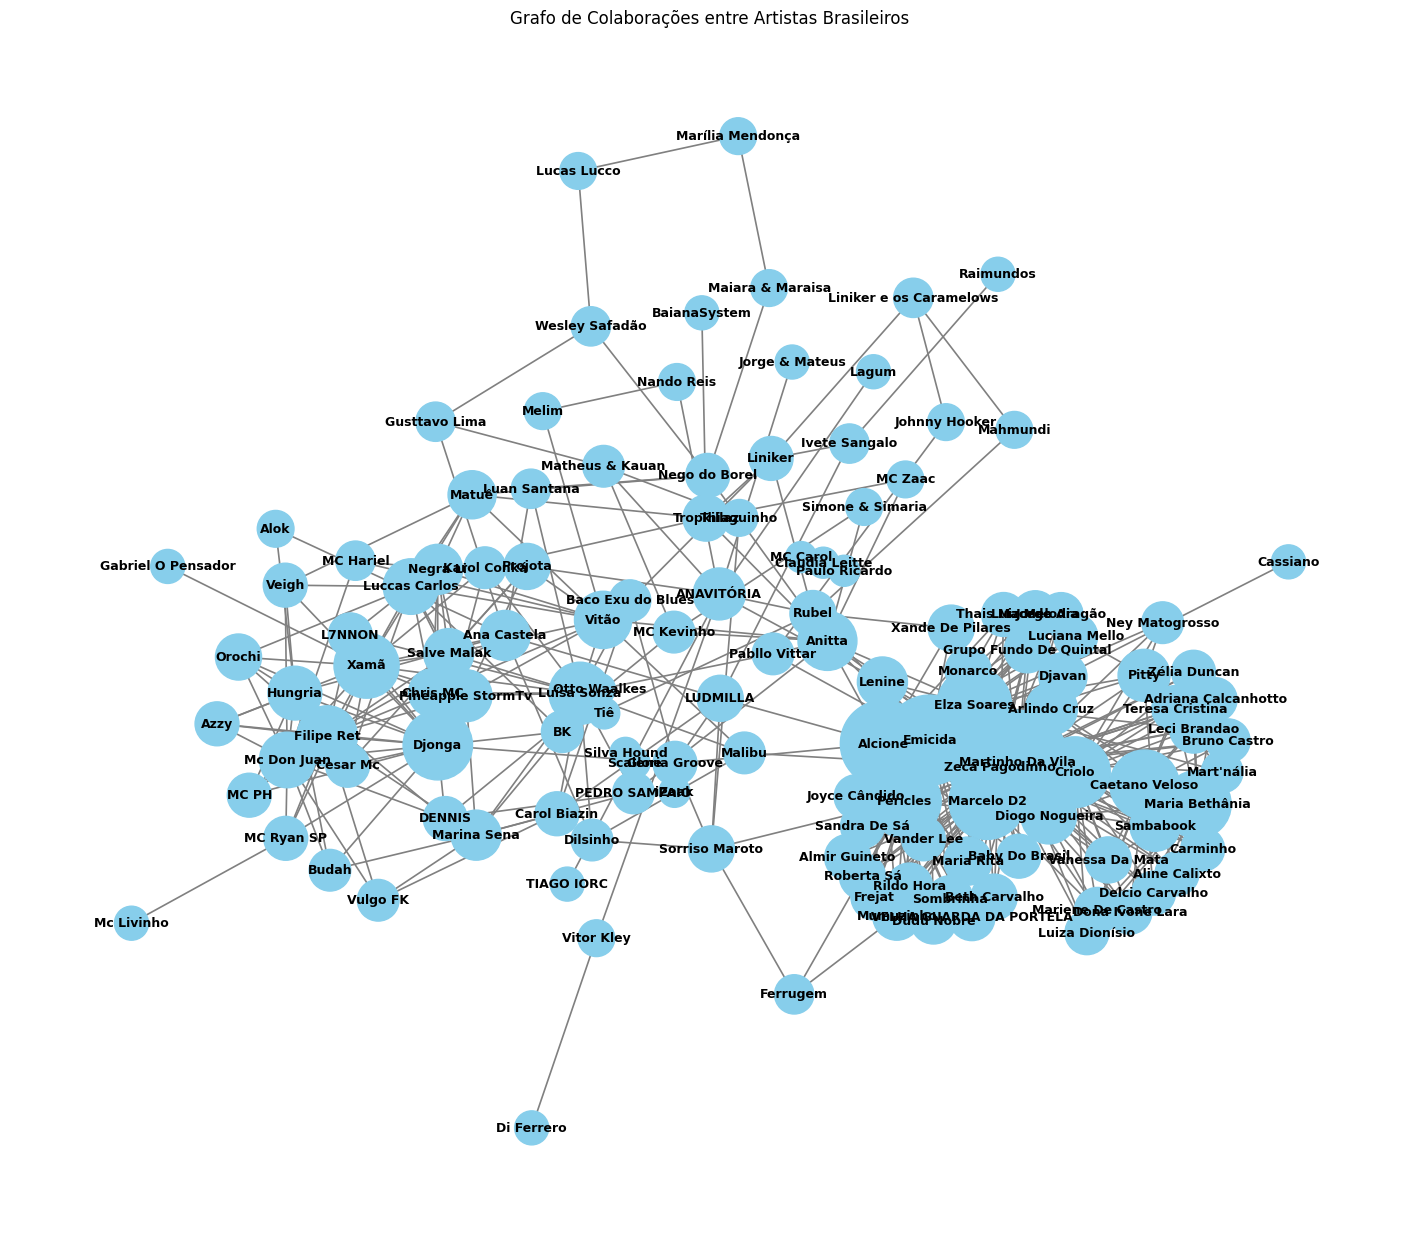

In [70]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
feats_df = pd.read_csv('feats_brasileiros.csv')

# Criar o grafo
G = nx.Graph()

# Adicionando as conexões (arestas) entre os artistas
for _, row in feats_df.iterrows():
    artista_principal = row['artista_principal']
    colaboradores = row['colaboradores'].split(', ')  # Dividir colaboradores em uma lista
    for colaborador in colaboradores:
        G.add_edge(artista_principal, colaborador, track=row['nome_track'])

# Filtrar nós que têm maior grau (mais conexões) para melhorar a visualização
degree_threshold = 3
nodes_to_keep = [node for node, degree in G.degree() if degree > degree_threshold]
H = G.subgraph(nodes_to_keep)

# Configurar o layout para a visualização
pos = nx.kamada_kawai_layout(H)  # Layout mais equilibrado para grafos densos

# Desenhar o grafo
plt.figure(figsize=(14, 12))
node_sizes = [500 + 100 * H.degree(node) for node in H]  # Tamanho do nó baseado no grau
nx.draw(H, pos, with_labels=True, node_size=node_sizes, node_color="skyblue",
        font_size=9, font_weight="bold", edge_color="gray", width=1.2)

plt.title("Grafo de Colaborações entre Artistas Brasileiros")
plt.show()


In [75]:
import pandas as pd
import networkx as nx

# Carregar o arquivo CSV
feats_df = pd.read_csv('feats_brasileiros.csv')

# Criar o grafo
G = nx.Graph()

# Adicionar conexões entre os artistas com os dados de popularidade da faixa
for _, row in feats_df.iterrows():
    artista_principal = row['artista_principal']
    colaboradores = row['colaboradores'].split(', ')  # Dividir colaboradores em uma lista
    popularidade_track = row['popularidade_track']  # Popularidade da faixa

    for colaborador in colaboradores:
        G.add_edge(artista_principal, colaborador, popularity=popularidade_track)

# Calcular a centralidade de grau
degree_centrality = nx.degree_centrality(G)

# Calcular a média de popularidade das faixas para cada artista
average_popularity = {}
for node in G.nodes():
    popularities = [G[node][neighbor]['popularity'] for neighbor in G.neighbors(node)]
    average_popularity[node] = sum(popularities) / len(popularities) if popularities else 0

# Criar um DataFrame com os resultados
df_results = pd.DataFrame({
    'Artista': list(degree_centrality.keys()),
    'Grau de Centralidade': list(degree_centrality.values()),
    'Popularidade Média': [average_popularity[artist] for artist in degree_centrality.keys()]
})

# Calcular a correlação entre o grau de centralidade e a popularidade média
correlation = df_results['Grau de Centralidade'].corr(df_results['Popularidade Média'])

# Exibir os resultados
print("Correlação entre Centralidade de Grau e Popularidade Média:", correlation)
print(df_results)


Correlação entre Centralidade de Grau e Popularidade Média: 0.06293085498263075
Graph with 562 nodes and 1020 edges
           Artista  Grau de Centralidade  Popularidade Média
0             Alok              0.035651               70.35
1        Ella Eyre              0.001783               78.00
2       Kenny Dope              0.001783               78.00
3       Never Dull              0.001783               78.00
4       Mondello'G              0.001783               76.00
..             ...                   ...                 ...
557          JXNV$              0.001783               56.00
558        Fleezus              0.001783               55.00
559       Mc Carol              0.001783               46.00
560    Luedji Luna              0.001783               44.00
561  Erasmo Carlos              0.003565               40.50

[562 rows x 3 columns]
